**Iris Flower Measurements Analysis**


In [33]:
"""Imports and Data Loading"""

import os
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols 

# Read dataset
file_path = os.path.realpath("C:\\Users\\NedyaIbrahim-AI23GBG\\Documents\\Github\\Statistical_methods\\Labb\\data\\iris.csv")
iris = pd.read_csv(file_path)

# Display the first rows of the dataset
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*Dataset Analysis*

In [34]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
# Check for missing values
iris.isnull().any()

sepal_length     False
 sepal_width     False
 petal_length    False
 petal_width     False
 class           False
dtype: bool

In [36]:
# Remove spaces from column names
iris.columns = iris.columns.str.strip()

# Use updated column names
iris.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [37]:
"""Statistical Summary for Each Class"""

# Create and present a statistical summary for each unique class in the dataset
grouped_class = iris.groupby("class")
for class_value, data in grouped_class:
    print(f"{class_value.capitalize()}:")
    display(data.describe())

Iris-setosa:


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


Iris-versicolor:


,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Iris-virginica:


,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [38]:
#The mean values for each class
print(iris.groupby('class').mean(numeric_only=True))

                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


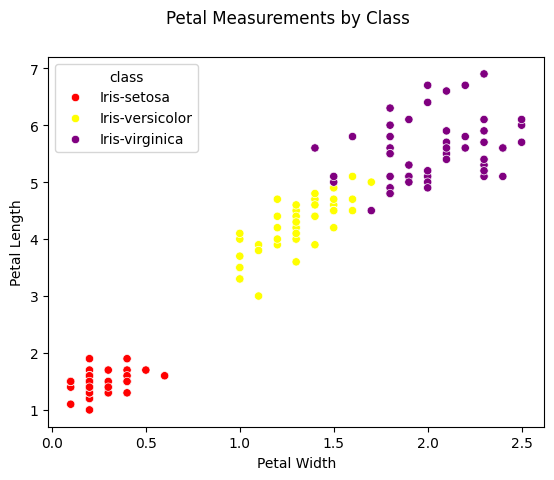

In [39]:
# Create a scatter plot for petal_width and petal_length, colored by class
custom_palette = {"Iris-setosa": "red", "Iris-versicolor": "yellow", "Iris-virginica": "purple"}
sns.scatterplot(data=iris, x="petal_width", y="petal_length", hue="class", palette=custom_palette)
plt.suptitle("Petal Measurements by Class")
# Change the label on the x-axis
plt.xlabel("Petal Width")
# Change the label on the y-axis
plt.ylabel("Petal Length")
#plt.savefig("visualization/Petal_Measurements_by_Class.png", bbox_inches="tight")

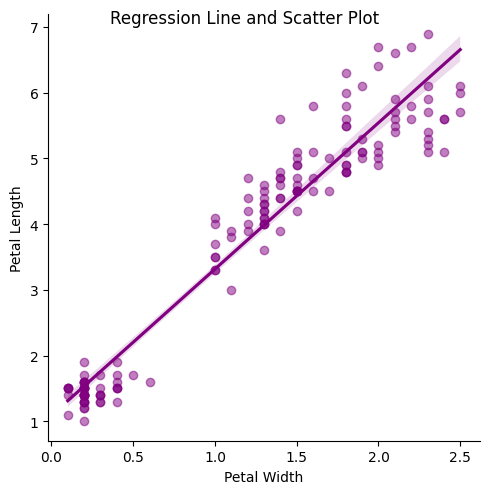

In [40]:
# Use lmplot to show a regression line 
# Visualize the correlation between petal width and length across the whole dataset
# Adjust the transparency (alpha) using scatter_kws to enhance the visibility of overlapping points.
sns.lmplot(data=iris, x="petal_width", y="petal_length", scatter_kws={"alpha": 0.5, "color": "purple"}, line_kws={"color": "purple"})

# Add a title on top of the plot
plt.suptitle("Regression Line and Scatter Plot")
#plt.savefig("visualization/Regression_Line_and_Scatter_Plot.png", bbox_inches="tight")

# Change the label on the x and y-axis
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")

# Show the plot
plt.show()


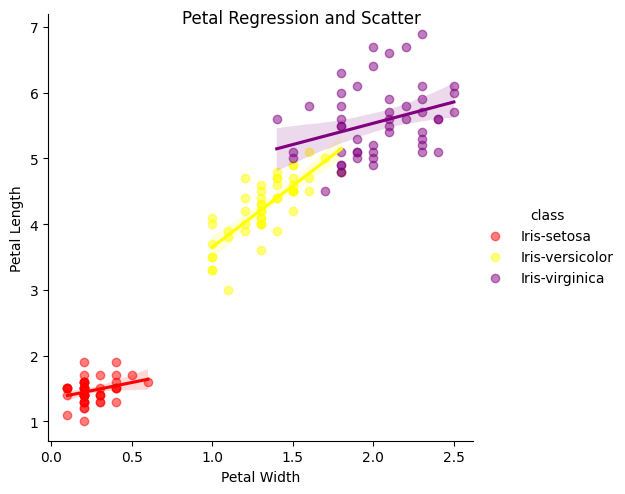

In [41]:
"""Regression Line with Different Colors for Each Class"""
# Use lmplot to show a regression line with different colors for each class
# Plot petal_width - length for the entire dataset with color coding by class
# Adjust the transparency (alpha) using scatter_kws to enhance the visibility of overlapping points.

sns.lmplot(data=iris, x="petal_width", y="petal_length", hue="class",palette=custom_palette, scatter_kws={"alpha": 0.5})
plt.suptitle("Petal Regression and Scatter")

# Change the label on the x and y-axis
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")

#plt.savefig("visualization/Petal_Regression_and_Scatter.png", bbox_inches="tight")

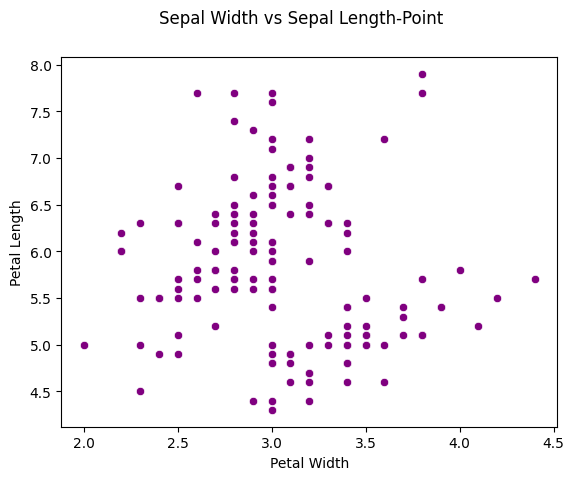

In [42]:
"""Scatter Plot for Sepal Measurements"""

# Create a scatter plot for sepal_width and sepal_length
sns.scatterplot(data=iris, x="sepal_width", y="sepal_length", color="purple")

plt.suptitle("Sepal Width vs Sepal Length-Point")

# Change the label on the x and y-axis
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")

#plt.savefig("visualization/Sepal_Width_vs_Sepal_Length_Point.png", bbox_inches="tight")




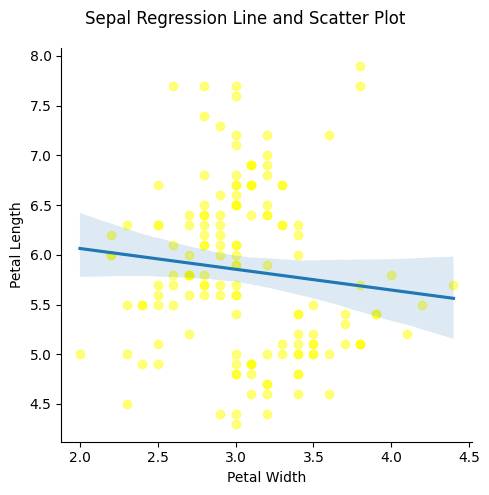

In [43]:
""" Regression Line for Sepal Measurements.
 We can visualize a regression line; however, it's evident that the discrepancies or 
 residuals are more substantial for sepals compared to what we observed for petals.
"""

#Visualize the relationship between sepal_width and sepal_length for the entire dataset.
#Adjusting transparency through scatter_kws to improve the visibility of overlapping points.

sns.lmplot(data=iris, x="sepal_width", y="sepal_length", scatter_kws={"alpha": 0.5, "color": "yellow"})

# Add a title on top of the plot
plt.suptitle("Sepal Regression Line and Scatter Plot")

# Change the label on the x and y-axis
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")

# Adjust layout for better appearance
plt.tight_layout()

# Save the plot as an image file
#plt.savefig("visualization/Sepal_Regression_Line_and_Scatter_Plot.png", bbox_inches="tight")



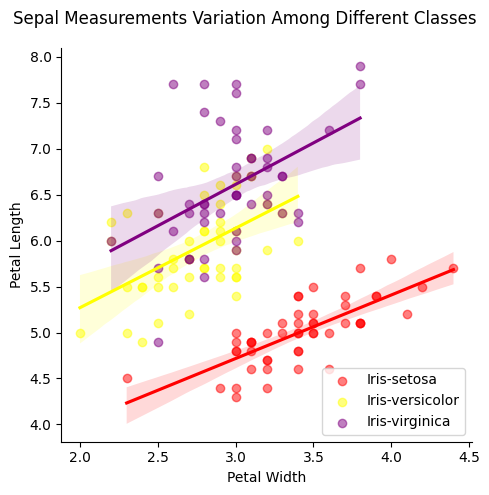

In [44]:
""" Regression Lines for Sepal Measurements by Class.
In this scenario, it could be more pertinent to examine the data on a per-species basis. This allows for a clearer observation of trends within the data, particularly for the setosa species.
"""
# Visualizing sepal width and length categorized by class
# Adjust the transparency (alpha) using scatter_kws to enhance the visibility of overlapping points
# Omit the legend since lmplot doesn't offer control over its placement; employ plt.legend afterwards to specify its position.

sns.lmplot(data=iris, x="sepal_width", y="sepal_length", hue="class", palette=custom_palette, scatter_kws={"alpha": 0.5}, legend=False)

plt.suptitle("Sepal Measurements Variation Among Different Classes")
plt.legend(loc="best")  

# Change the label on the x and y-axis
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")

# Adjust layout for better appearance
plt.tight_layout()

# Save the plot as an image file
#plt.savefig("visualization/Sepal_Measurements_Variation_Among_Different_Classes.png", bbox_inches="tight")

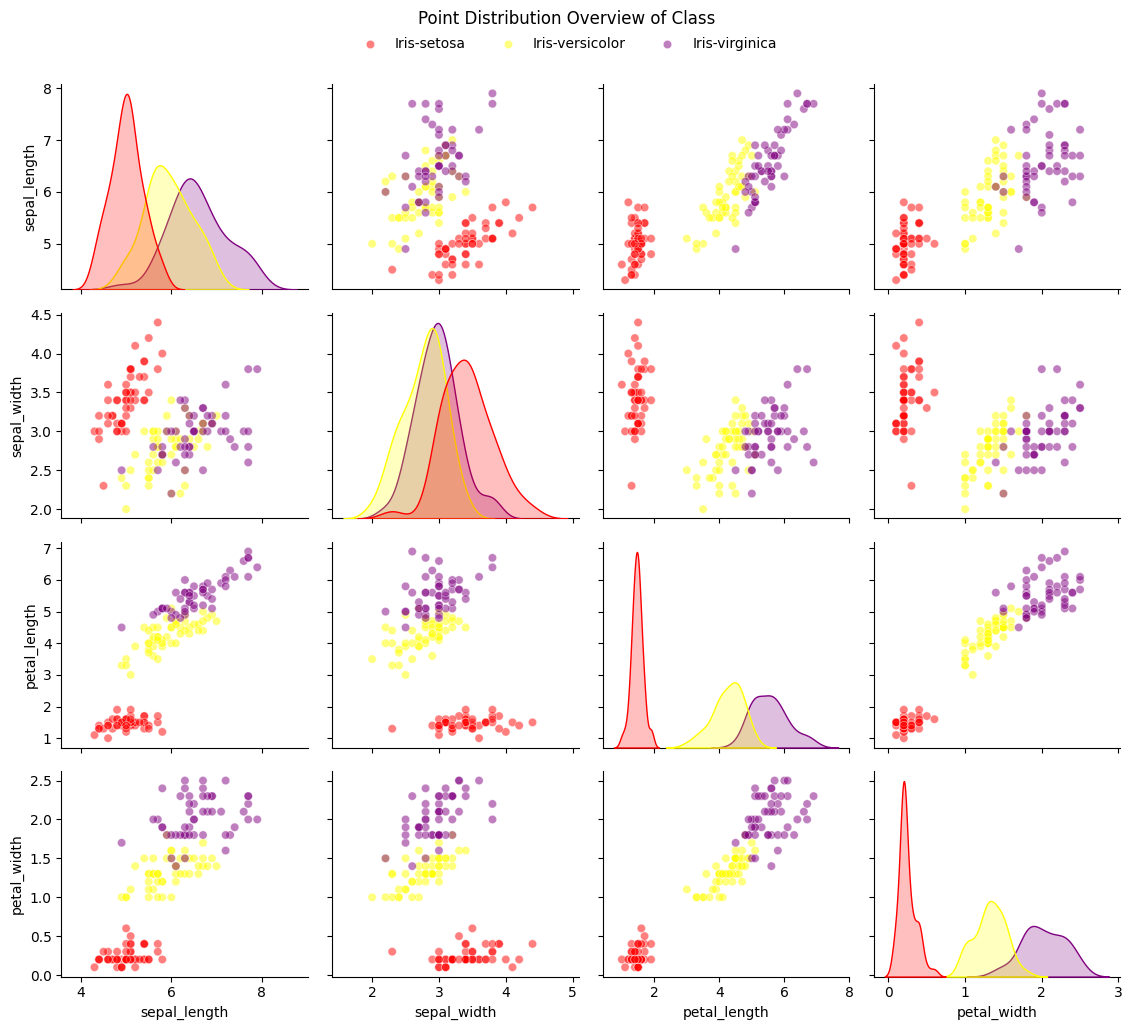

In [45]:
"""Pair Plot for Entire Dataset""" 

# Generate a pairplot for the entire dataset, creating a grid of all columns against each other.
# Utilize hue parameter with "Class" to distinguish points belonging to different classes.
# Adjust transparency (alpha) using plot_kws to enhance visibility of overlapping points

chart = sns.pairplot(iris, hue="class", palette=custom_palette, plot_kws=dict(alpha=0.5))

"""Move the legend to the upper center, specifying the position as 50% horizontally and 101% vertically 
to place it just above the plot. Additionally, adjust the title's vertical position to 102.5% to position
 it just above the customized legend."""

sns.move_legend(chart, "upper center", bbox_to_anchor=(0.5, 1.01), ncol=3, title="")
plt.suptitle("Point Distribution Overview of Class", y=1.025)


# Change the label on the x and y-axis
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")

# Adjust layout for better appearance
plt.tight_layout()

# Save the plot as an image file
#plt.savefig("visualization/Point_Distribution_Overview_of_Class.png", bbox_inches="tight")



In [46]:
"""
Note that the plot below is for r-squared, in other words,
values between 0-1 where a higher value represents a larger correlation (positive or negative).
"""
# Perform correlation analysis
corr = iris.corr(numeric_only=True)
class_corr = iris.groupby("class").apply(lambda x: x.corr(numeric_only=True))

# Access correlation matrices for each class
corr_setosa = class_corr.loc["Iris-setosa"]
corr_versicolor = class_corr.loc["Iris-versicolor"]
corr_virginica = class_corr.loc["Iris-virginica"]

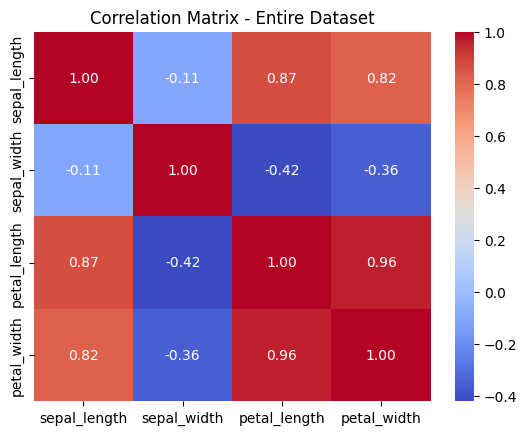

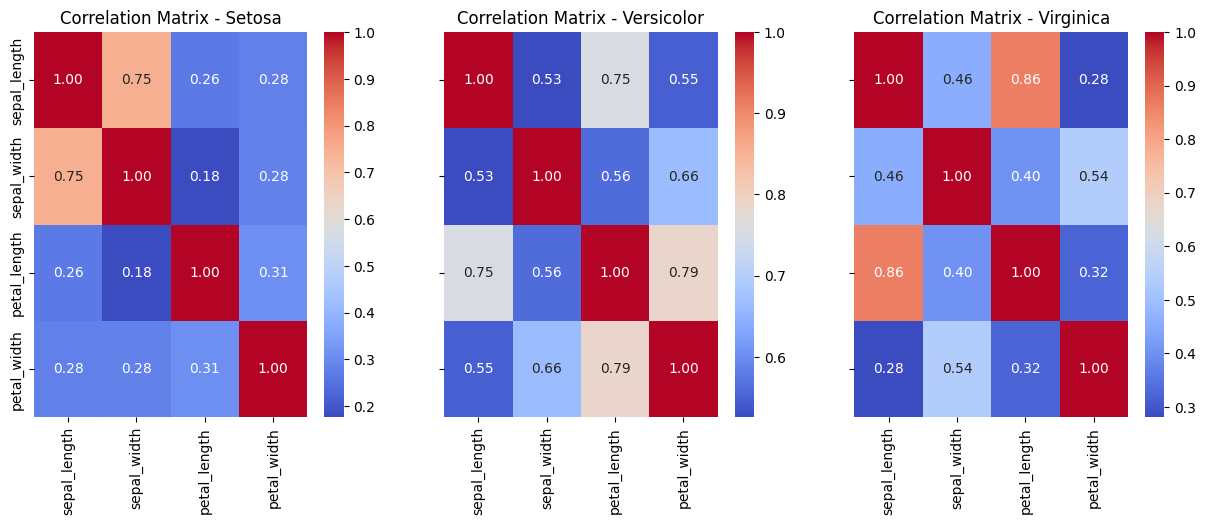

In [47]:
# Skapa en heatmap för hela datasetets korrelationsmatris
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Entire Dataset")
plt.show()

# Skapa heatmaps för varje klass
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.heatmap(corr_setosa, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix - Setosa")

sns.heatmap(corr_versicolor, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix - Versicolor")

sns.heatmap(corr_virginica, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[2])
axes[2].set_title("Correlation Matrix - Virginica")

# Save the plot as an image file
#plt.savefig("visualization/Exploring_Correlation_Patterns.png", bbox_inches="tight")

plt.show()

In [53]:
"""Exact Values of Correlations (r-squared)"""
print(corr**2)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000     0.011962      0.759955     0.669048
sepal_width       0.011962     1.000000      0.176834     0.127124
petal_length      0.759955     0.176834      1.000000     0.926901
petal_width       0.669048     0.127124      0.926901     1.000000


In [49]:
"""Petal and Sepal Correlation Tests"""

# Petal correlation test to get r and p-value
# Use bivariate correlation because there are 2 compared variables
r, p = scs.pearsonr(iris["petal_width"], iris["petal_length"])
print(f"Petal correlation: r = {round(r, 3)}, p = {p}")

# Sepal correlation test to get r and p-value
# Use bivariate correlation because there are 2 compared variables
r, p = scs.pearsonr(iris["sepal_width"], iris["sepal_length"])
print(f"Sepal correlation: r = {round(r, 3)}, p = {p}")

Petal correlation: r = 0.963, p = 5.776660988495174e-86
Sepal correlation: r = -0.109, p = 0.18276521527136963


In [50]:
"""Linear Regression Using Ordinary Least Squares (OLS) for Petals"""

# Define the formula for the linear regression model
formula = "petal_length ~ petal_width"

# Fit the model using ordinary least squares
model = ols(formula, data=iris).fit()

# Display the summary of the regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1877.
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           5.78e-86
Time:                        04:25:11   Log-Likelihood:                -101.32
No. Observations:                 150   AIC:                             206.6
Df Residuals:                     148   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0906      0.073     14.951      

In [51]:
# Predict y-variable (petal_length) based on X-variable (petal_width measurements)
ypred = model.predict(iris[["petal_width"]])

# Display the predicted values
print(ypred)

0      1.535749
1      1.535749
2      1.535749
3      1.535749
4      1.535749
         ...   
145    6.210108
146    5.319754
147    5.542343
148    6.210108
149    5.097166
Length: 150, dtype: float64


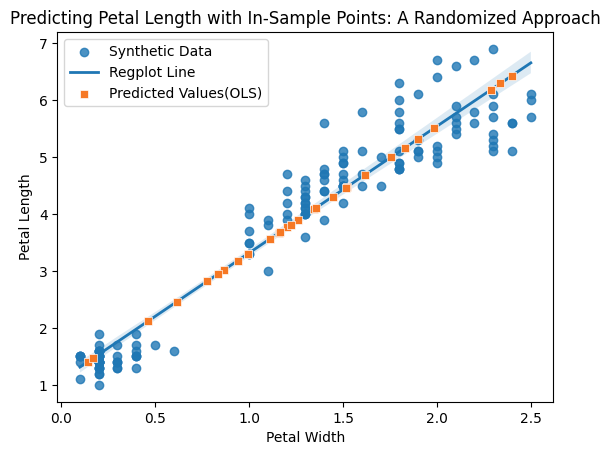

In [52]:
"""In-Sample Predictions of Randomly Generated Points""" 

# Create random x-values within the range of petal width measurements, spanning from the minimum to the maximum values
random_points = pd.DataFrame(np.random.uniform(min(iris["petal_width"]), max(iris["petal_width"]), 30), columns=["petal_width"])

# Make predictions of y-values based on x-values
ypred = model.predict(random_points)
colors = sns.color_palette("Oranges")

# Plot the entire dataset and predicted points
sns.regplot(data=iris, x="petal_width", y="petal_length", label="Synthetic Data", line_kws=dict(linewidth=2, label="Regplot Line"))
sns.scatterplot(data=random_points, x="petal_width", y=ypred, zorder=10, color=colors [3], marker="s", label="Predicted Values(OLS)")

plt.title("Predicting Petal Length with In-Sample Points: A Randomized Approach")

# Change the label on the x and y-axis
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")

# Save the plot as an image file
#plt.savefig("visualization/Predicting_Petal_Length_with_In_Sample_Points.png", bbox_inches="tight")

# Show the plot
plt.show()